# Credit Card Dataset for Clustering

In [1]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# ---------------------------------------------
# Data Preprocessing
# ---------------------------------------------

# Load the dataset from the zip file
zip_file_path = 'Credit Card Dataset for Clustering.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall()

# Load the CSV data into a pandas DataFrame
csv_file_name = 'CC GENERAL.csv'
df = pd.read_csv(csv_file_name)

# Step 1: Inspect the initial dataset
print("Initial DataFrame:")
print(df.head())
print("\nDataset Information:")
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe())

Initial DataFrame:
  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                


Missing Values After Imputation:
CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Number of rows after dropping duplicates: 8950


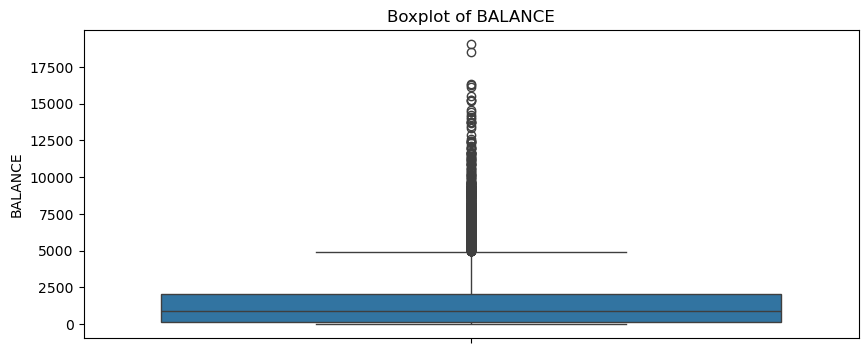

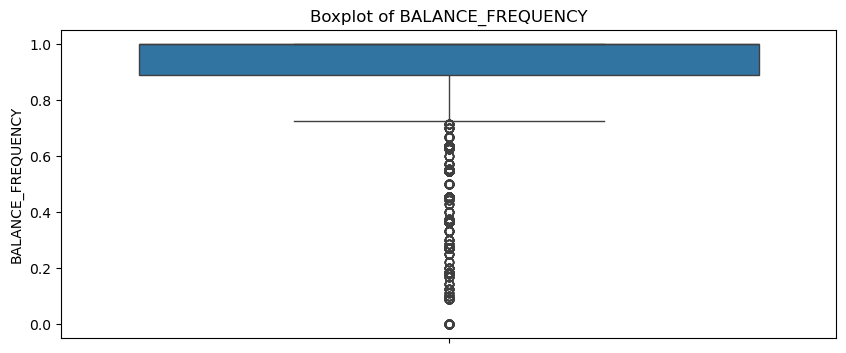

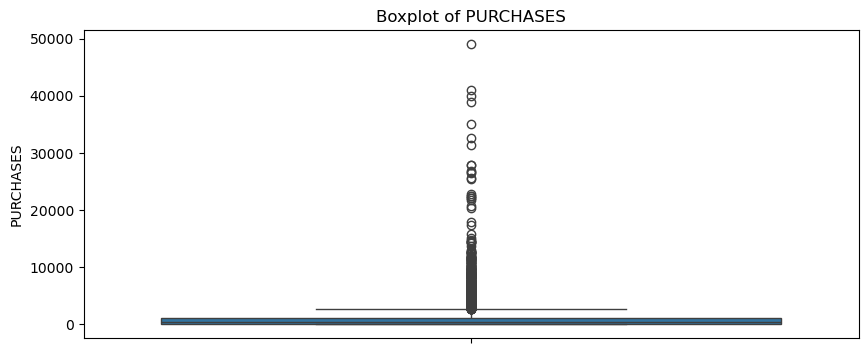

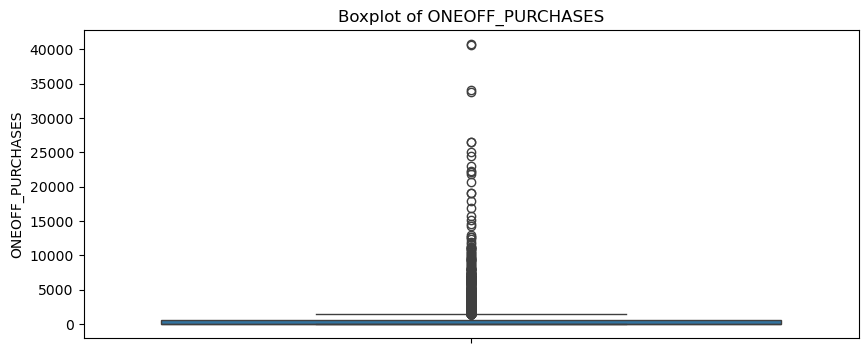

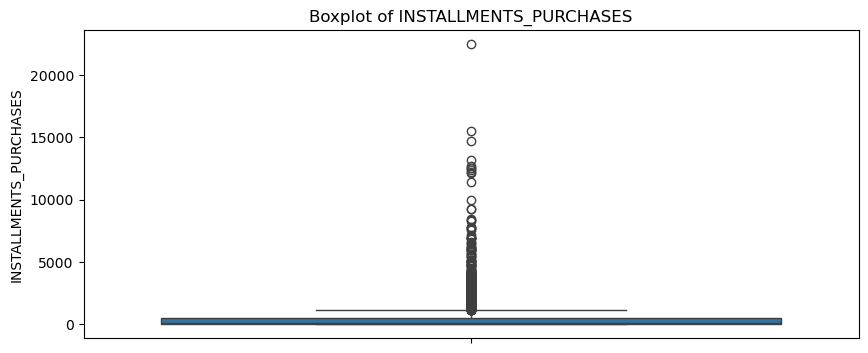

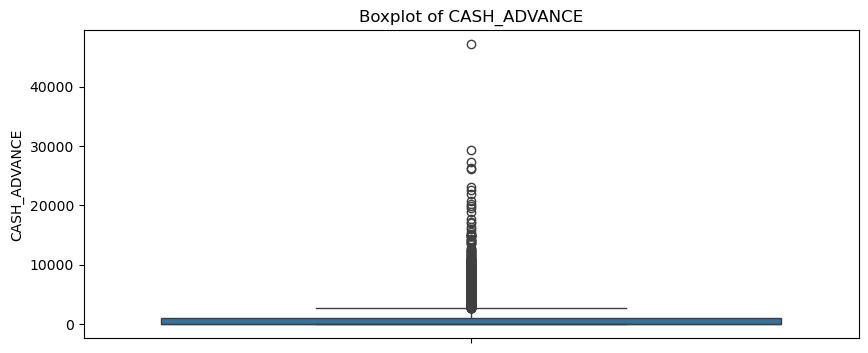

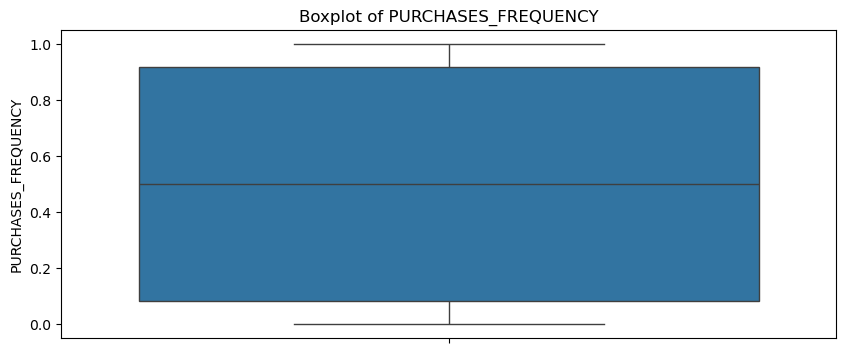

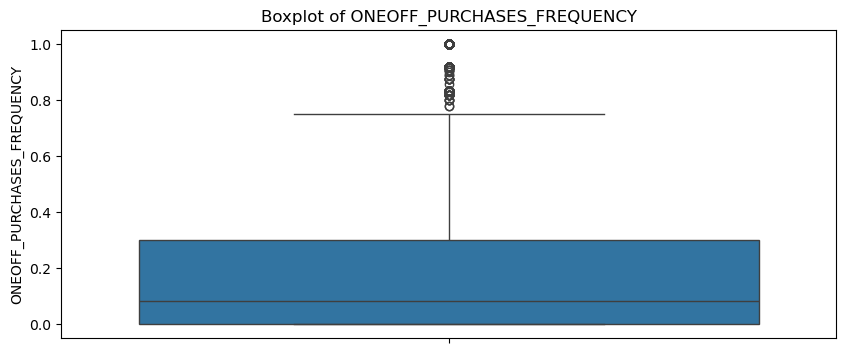

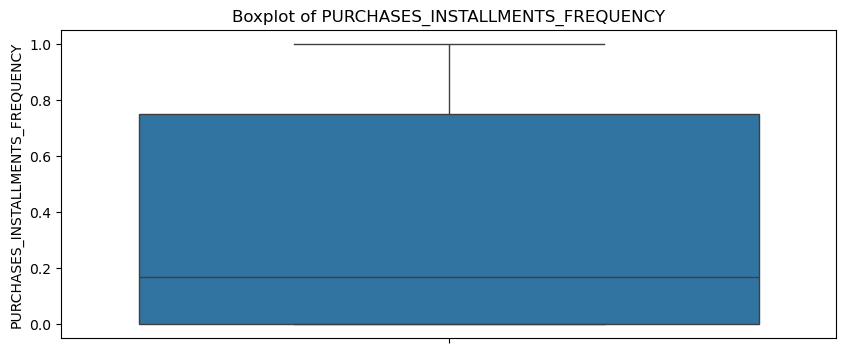

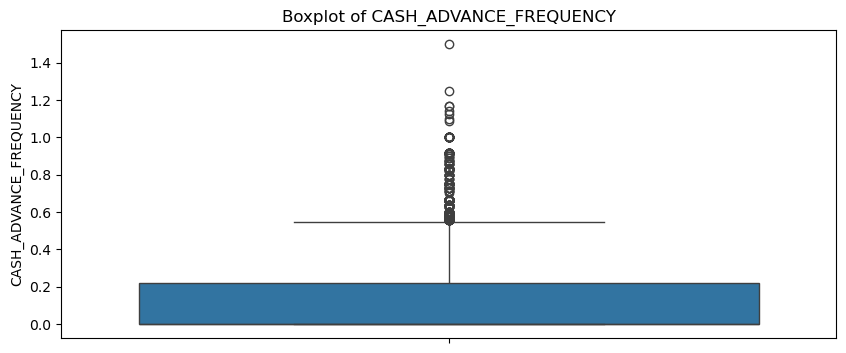

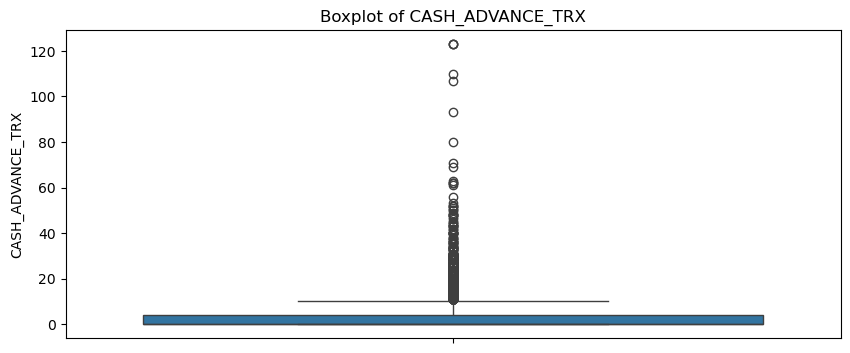

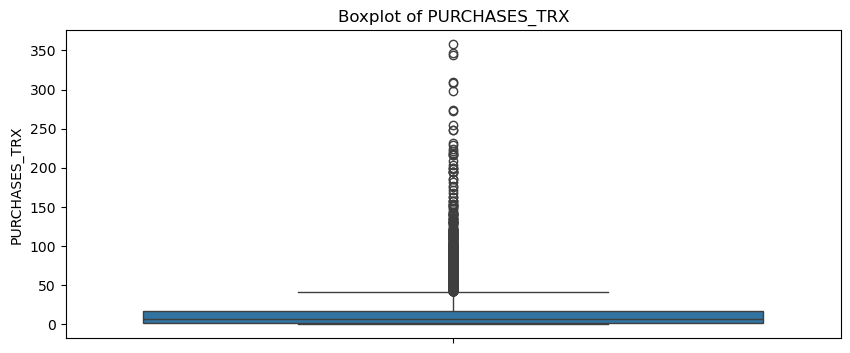

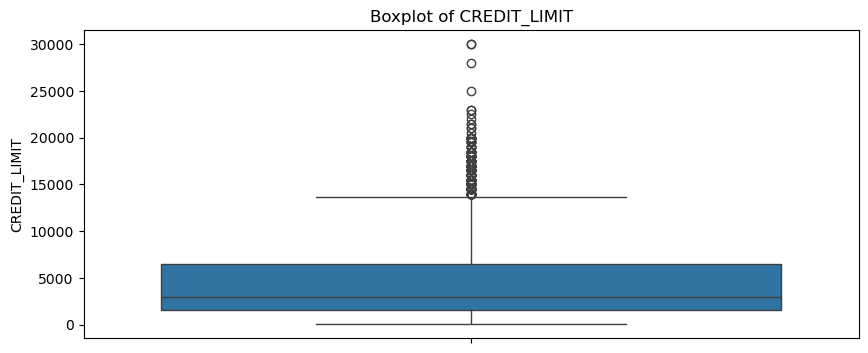

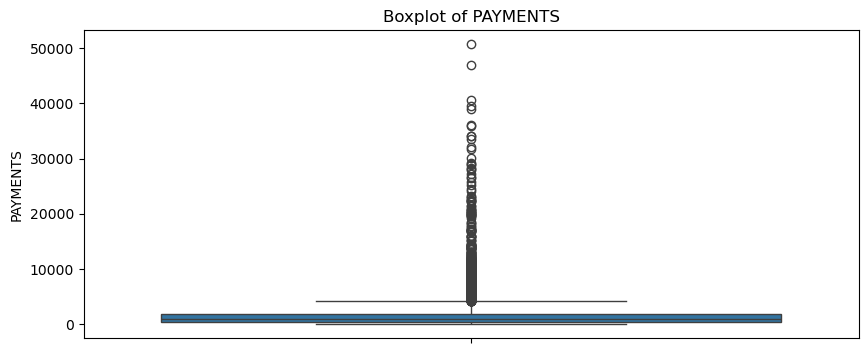

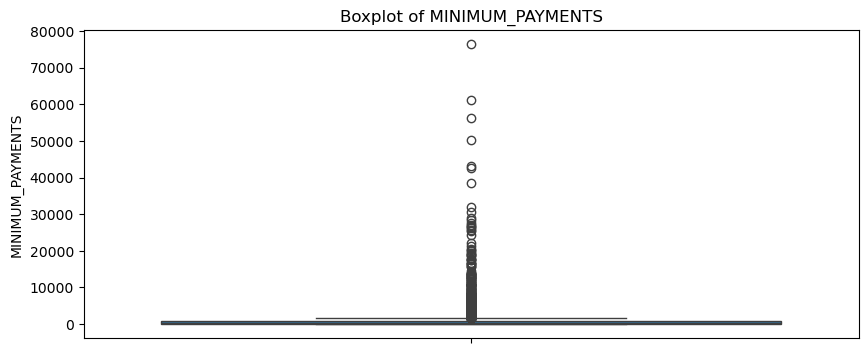

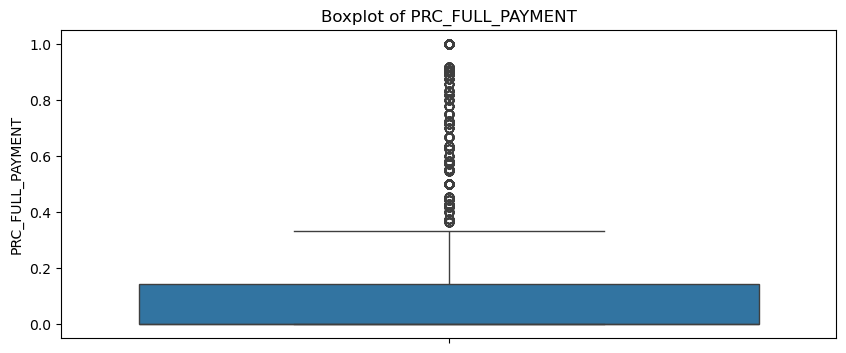

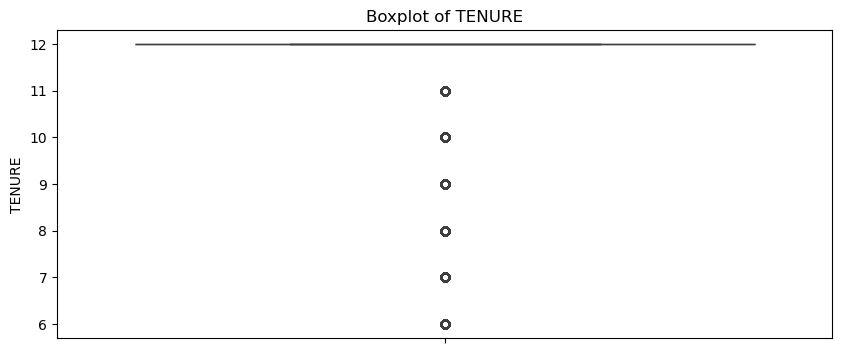

In [3]:
# Step 2: Clean 'CREDIT_LIMIT' and 'MINIMUM_PAYMENTS'
# Remove $ signs and convert to float, then impute missing values with the median
for column in ['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']:
    df[column] = df[column].replace(r'[\$,]', '', regex=True).astype(float).fillna(df[column].median())

# Check for missing values after cleaning
print("\nMissing Values After Imputation:")
print(df.isnull().sum())

# Step 3: Drop duplicates if there are any
df.drop_duplicates(inplace=True)
print(f"\nNumber of rows after dropping duplicates: {df.shape[0]}")

# Step 4: Visualize outliers using boxplots for numerical features
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [4]:
# Step 5: Create new features
df['MONTHLY_AVG_PURCHASE'] = df['PURCHASES'] / df['TENURE']
df['CREDIT_UTILIZATION'] = df['BALANCE'] / df['CREDIT_LIMIT']
df['PAYMENT_MIN_PAYMENT_RATIO'] = df['PAYMENTS'] / (df['MINIMUM_PAYMENTS'] + 1e-5)  # Avoid division by zero

# Inspect the dataset after adding new features
print("\nDataset with New Features:")
print(df[['PURCHASES', 'TENURE', 'MONTHLY_AVG_PURCHASE', 'CREDIT_UTILIZATION', 'PAYMENT_MIN_PAYMENT_RATIO']].head())



Dataset with New Features:
   PURCHASES  TENURE  MONTHLY_AVG_PURCHASE  CREDIT_UTILIZATION  \
0      95.40      12              7.950000            0.040901   
1       0.00      12              0.000000            0.457495   
2     773.17      12             64.430833            0.332687   
3    1499.00      12            124.916667            0.222223   
4      16.00      12              1.333333            0.681429   

   PAYMENT_MIN_PAYMENT_RATIO  
0                   1.446508  
1                   3.826241  
2                   0.991682  
3                   0.000000  
4                   2.771074  


In [5]:
# Step 6: Scale the numerical columns
columns_to_scale = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 
                    'PAYMENTS', 'MINIMUM_PAYMENTS', 'MONTHLY_AVG_PURCHASE', 
                    'CREDIT_UTILIZATION', 'PAYMENT_MIN_PAYMENT_RATIO']

# Apply StandardScaler to normalize the selected columns
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])

# Inspect the scaled data
print("\nDataset After Scaling:")
print(df_scaled[columns_to_scale].head())


Dataset After Scaling:
    BALANCE  PURCHASES  CASH_ADVANCE  CREDIT_LIMIT  PAYMENTS  \
0 -0.731989  -0.424900     -0.466786     -0.960378 -0.528979   
1  0.786961  -0.469552      2.605605      0.688678  0.818642   
2  0.447135  -0.107668     -0.466786      0.826100 -0.383805   
3  0.049099   0.232058     -0.368653      0.826100 -0.598688   
4 -0.358775  -0.462063     -0.466786     -0.905410 -0.364368   

   MINIMUM_PAYMENTS  MONTHLY_AVG_PURCHASE  CREDIT_UTILIZATION  \
0         -0.302400             -0.433384           -0.892951   
1          0.097500             -0.477428            0.176063   
2         -0.093293             -0.120468           -0.144206   
3         -0.228307              0.214636           -0.427665   
4         -0.257266             -0.470041            0.750693   

   PAYMENT_MIN_PAYMENT_RATIO  
0                  -0.064427  
1                  -0.044285  
2                  -0.068276  
3                  -0.076669  
4                  -0.053216  


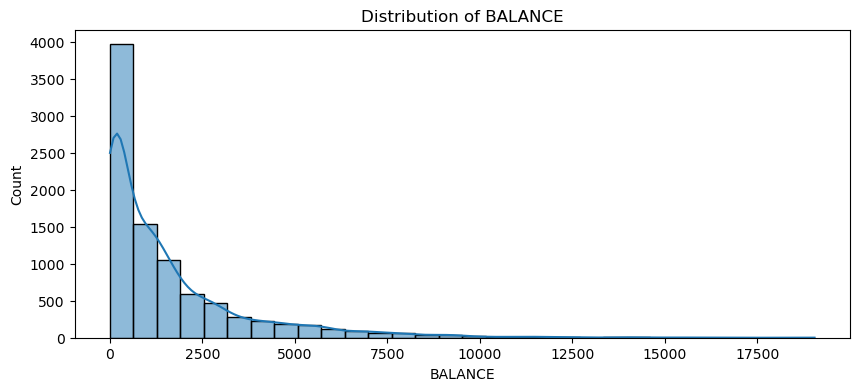

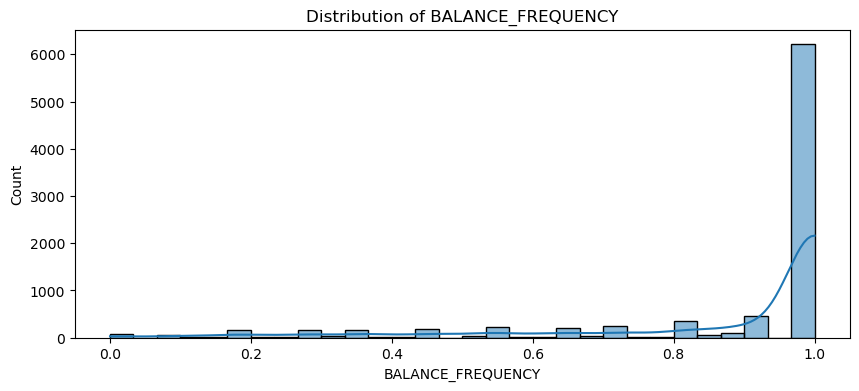

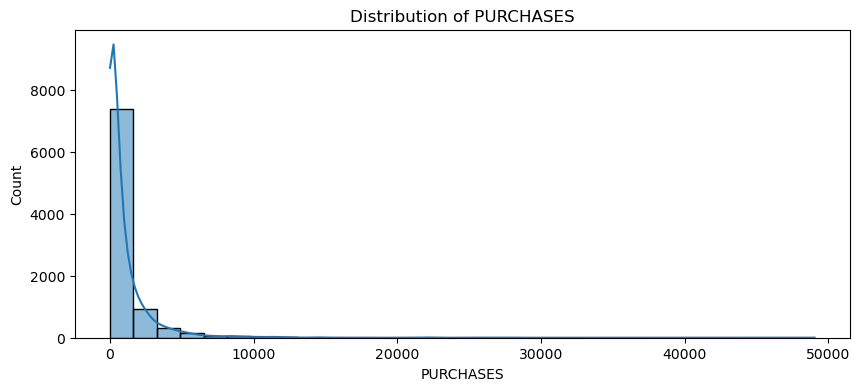

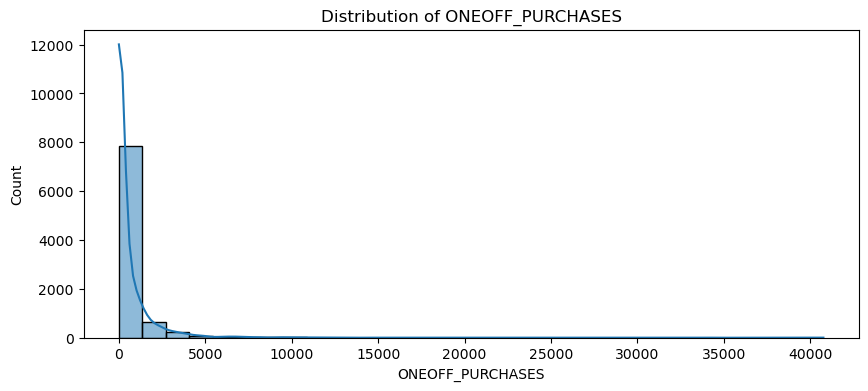

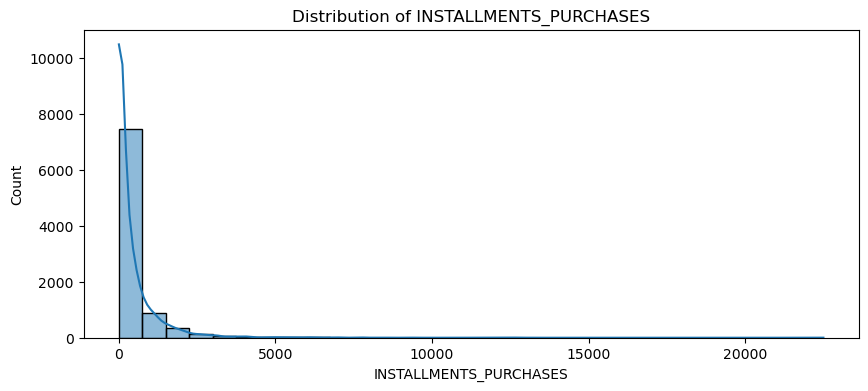

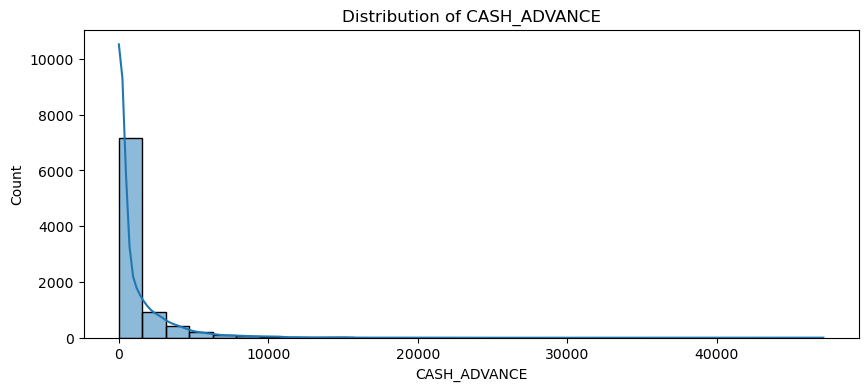

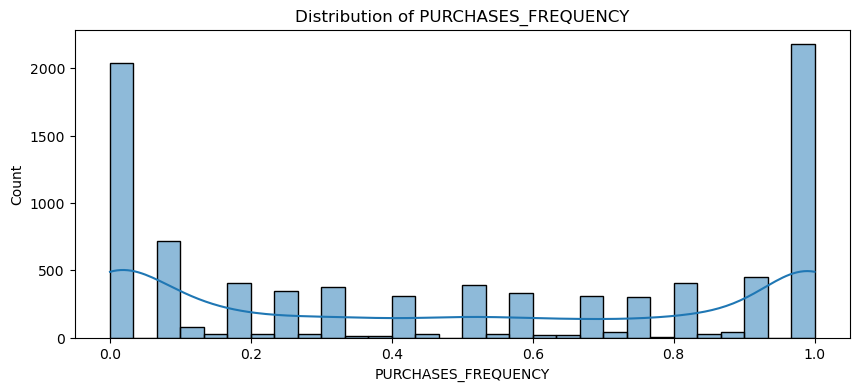

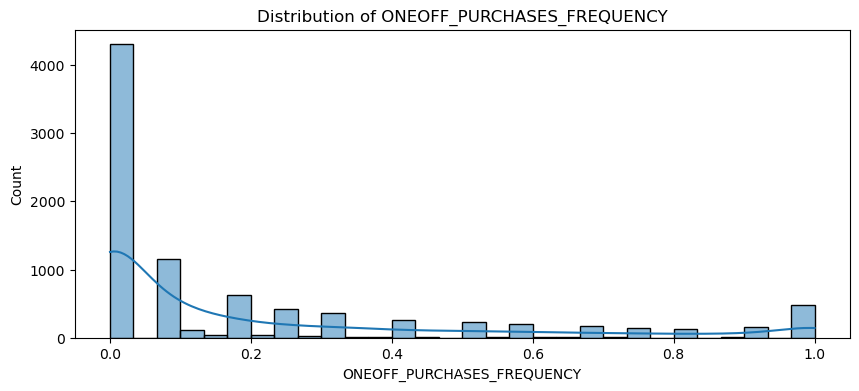

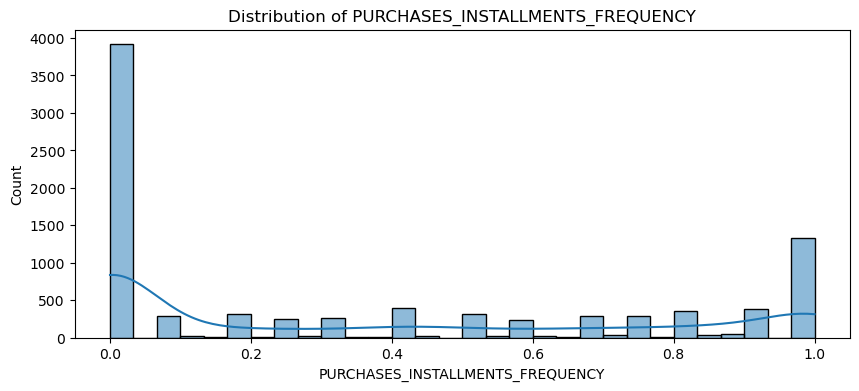

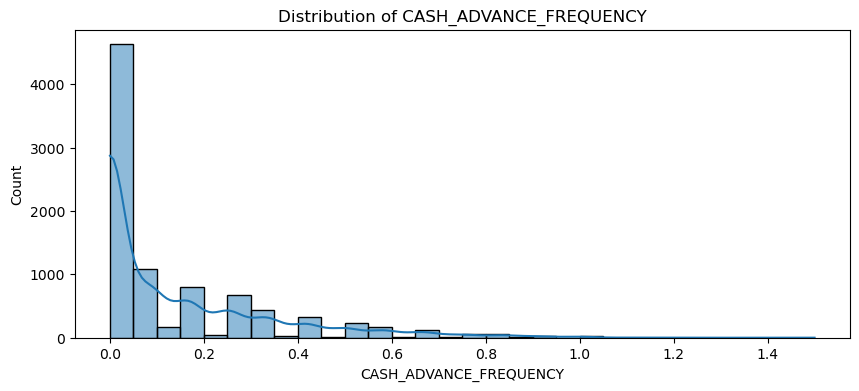

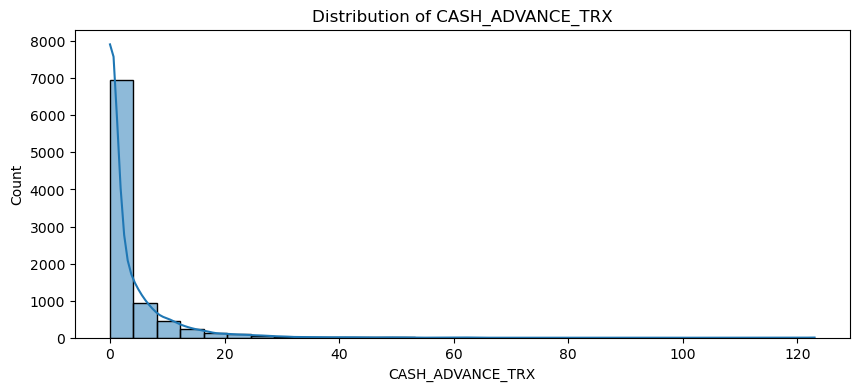

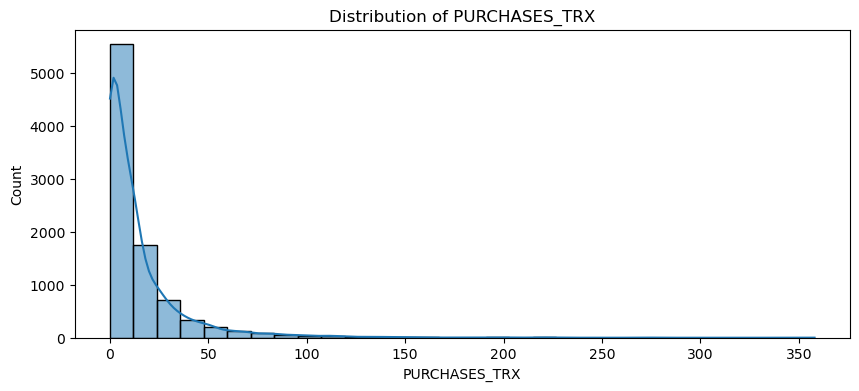

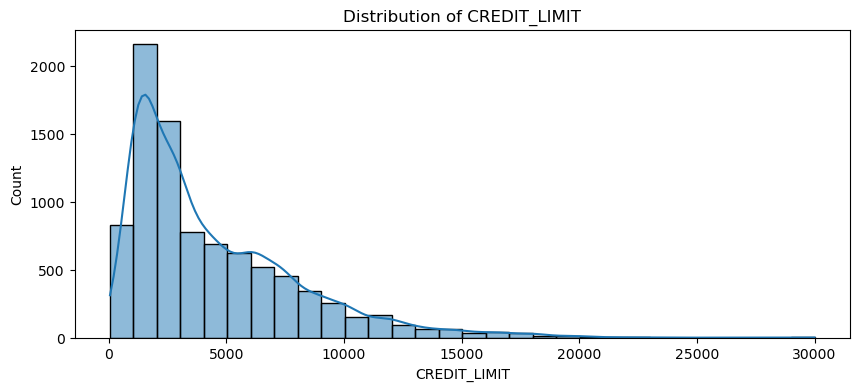

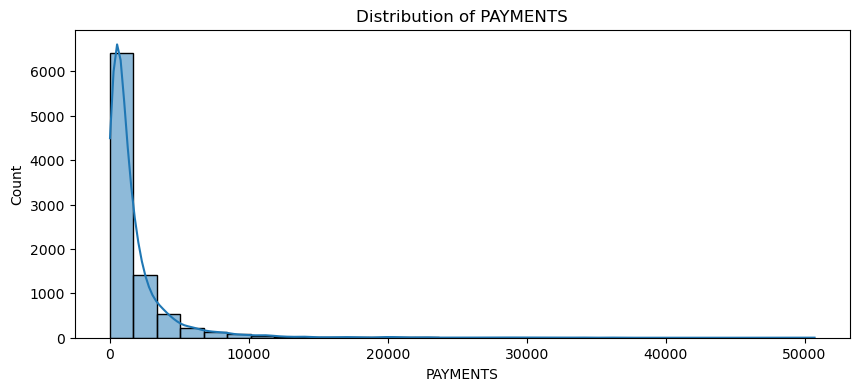

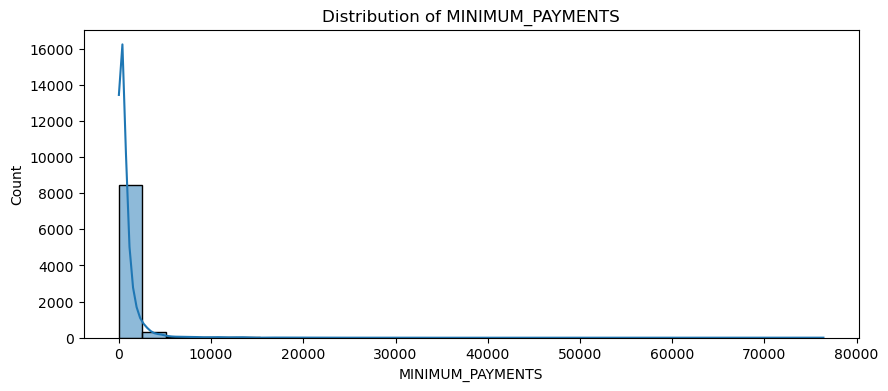

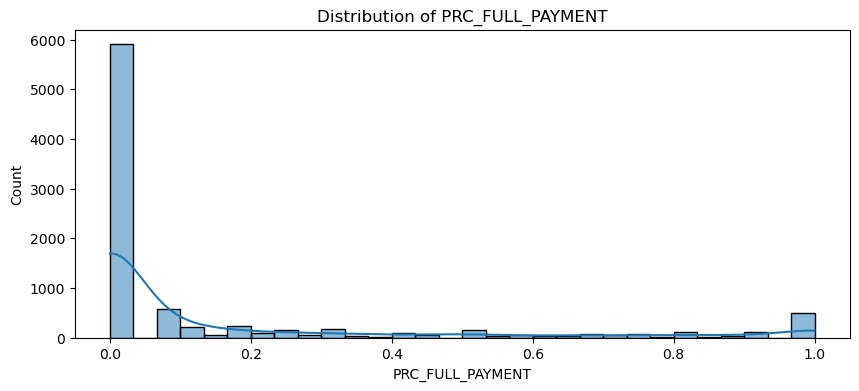

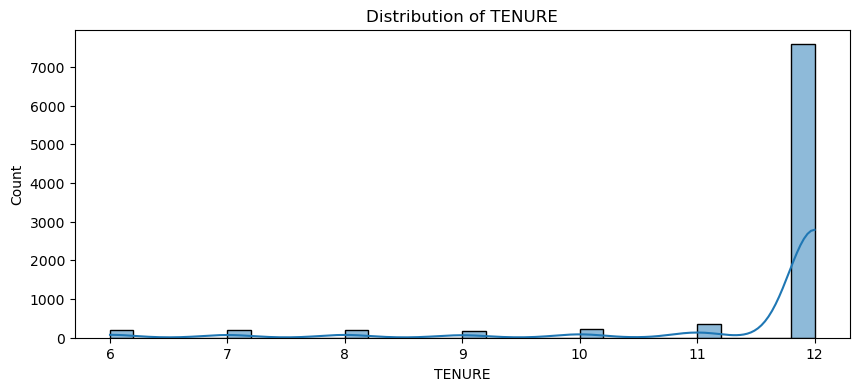

In [6]:
# Step 7: Univariate analysis - Plot histograms for key numerical features
for column in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.show()

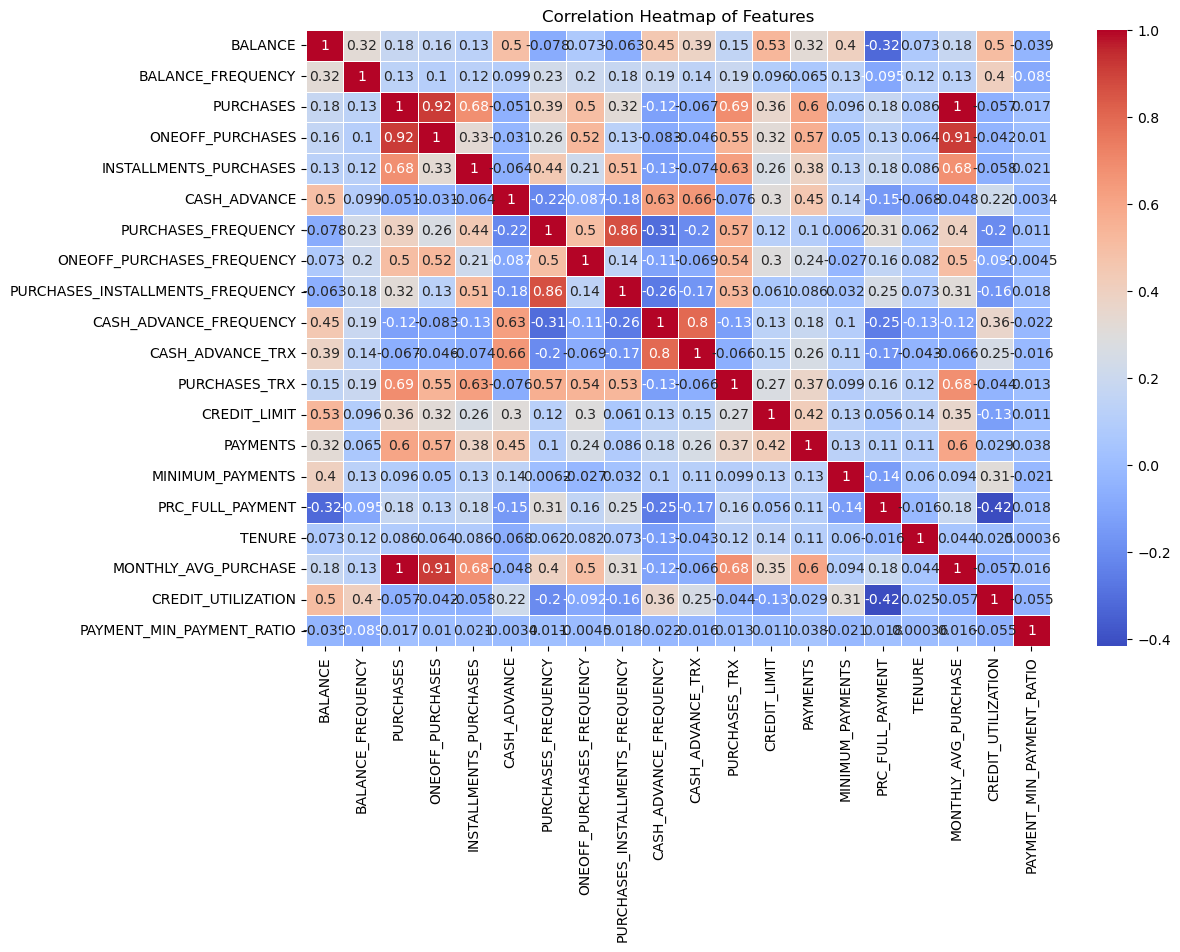

In [7]:
# Step 8: Correlation heatmap
# Select only numeric columns from the scaled DataFrame for correlation
numeric_columns_scaled = df_scaled.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_columns_scaled.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()


Segmentation Summary:
Spending_Segment
Medium Spender      4474
High Spender        2238
Low Spender         2238
Name: count, dtype: int64


C:\Users\milto\AppData\Local\Temp\ipykernel_18860\3068294347.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Spending_Segment', data=df, palette='viridis')


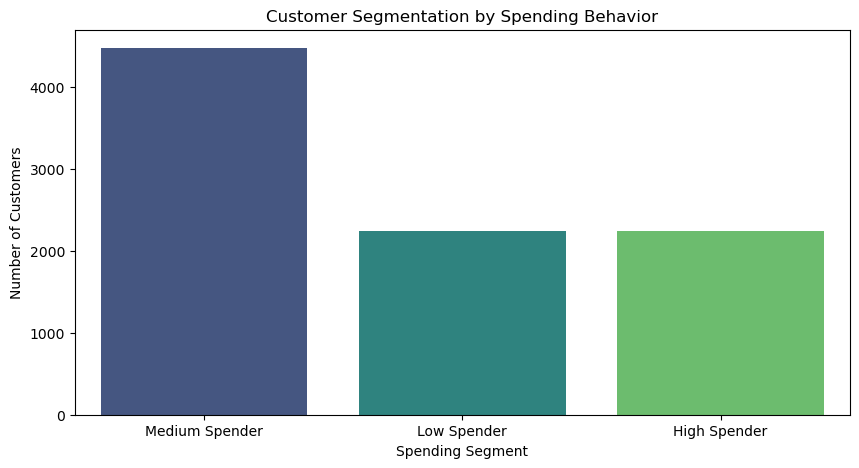

In [8]:
# ---------------------------------------------
# Customer Segmentation
# ---------------------------------------------

# Step 9: Define segments based on spending
high_spenders_threshold = df['PURCHASES'].quantile(0.75)
low_spenders_threshold = df['PURCHASES'].quantile(0.25)

df['Spending_Segment'] = df['PURCHASES'].apply(
    lambda x: 'High Spender' if x >= high_spenders_threshold else (
        'Low Spender' if x <= low_spenders_threshold else 'Medium Spender')
)

# Display segmentation summary
print("\nSegmentation Summary:")
print(df[['Spending_Segment']].value_counts())

# Step 10: Plot Spending Segments
plt.figure(figsize=(10, 5))
sns.countplot(x='Spending_Segment', data=df, palette='viridis')
plt.title('Customer Segmentation by Spending Behavior')
plt.xlabel('Spending Segment')
plt.ylabel('Number of Customers')
plt.show()


C:\Users\milto\AppData\Local\Temp\ipykernel_18860\2032530844.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_for_clustering.fillna(features_for_clustering.median(), inplace=True)


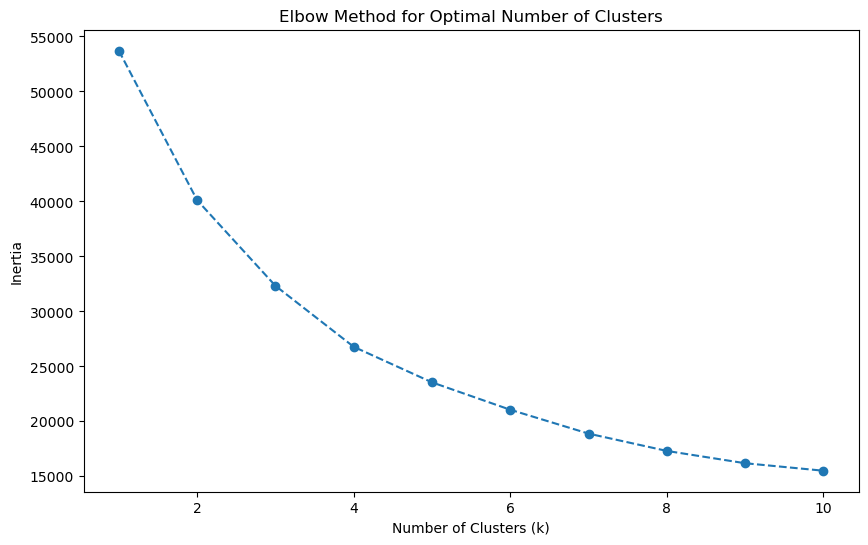

In [9]:
# ---------------------------------------------
# Clustering
# ---------------------------------------------

# Step 11: Select relevant features for clustering
features_for_clustering = df[['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 
                               'PAYMENTS', 'CREDIT_LIMIT', 'PRC_FULL_PAYMENT']]

# Handle missing values
features_for_clustering.fillna(features_for_clustering.median(), inplace=True)

# Step 12: Standardize the features
scaled_features = scaler.fit_transform(features_for_clustering)

# Step 13: Determine the optimal number of clusters using the Elbow Method
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Choose the number of clusters where the "elbow" occurs
optimal_k = 4  # Adjust based on the elbow plot


Cluster Assignments:
Cluster
1    5989
0    1462
2    1372
3     127
Name: count, dtype: int64


C:\Users\milto\AppData\Local\Temp\ipykernel_18860\2447366998.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df, palette='viridis')


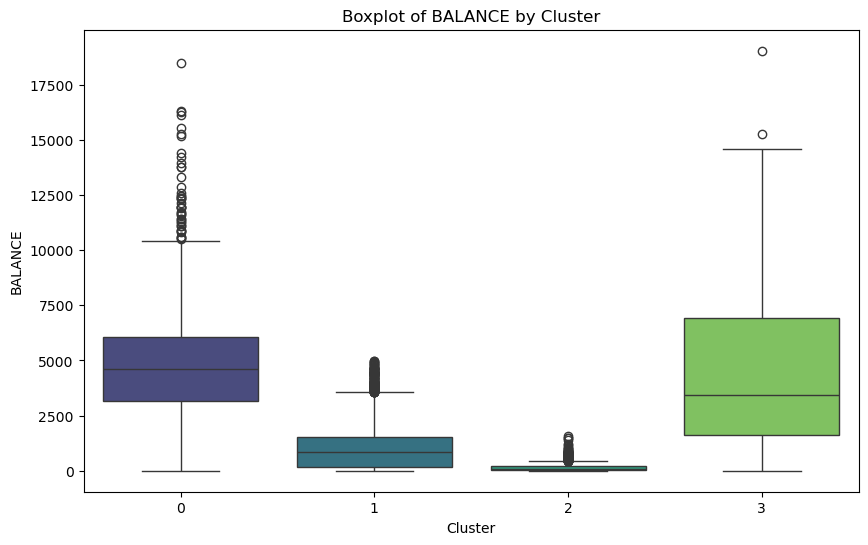

C:\Users\milto\AppData\Local\Temp\ipykernel_18860\2447366998.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df, palette='viridis')


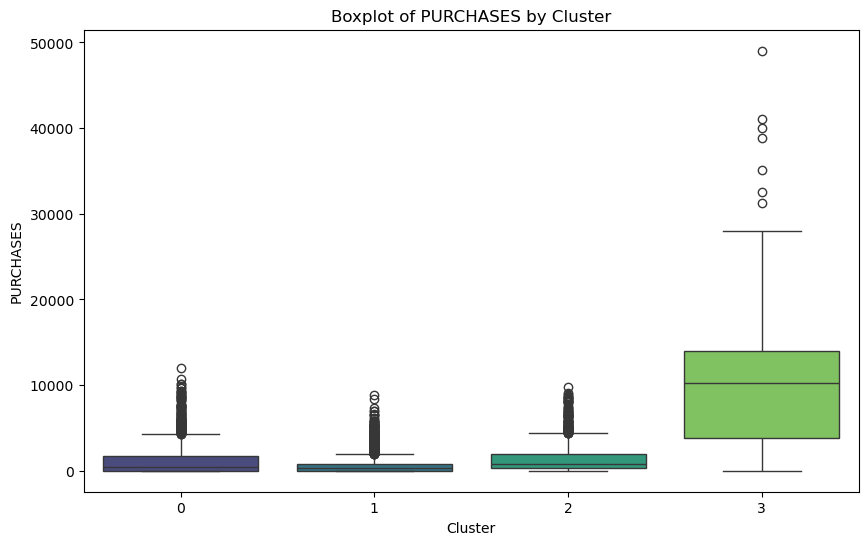

C:\Users\milto\AppData\Local\Temp\ipykernel_18860\2447366998.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df, palette='viridis')


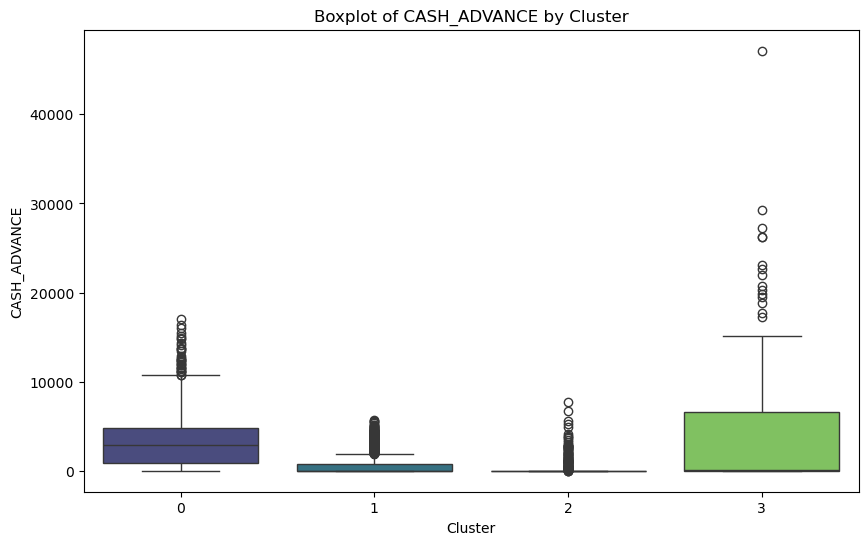

C:\Users\milto\AppData\Local\Temp\ipykernel_18860\2447366998.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df, palette='viridis')


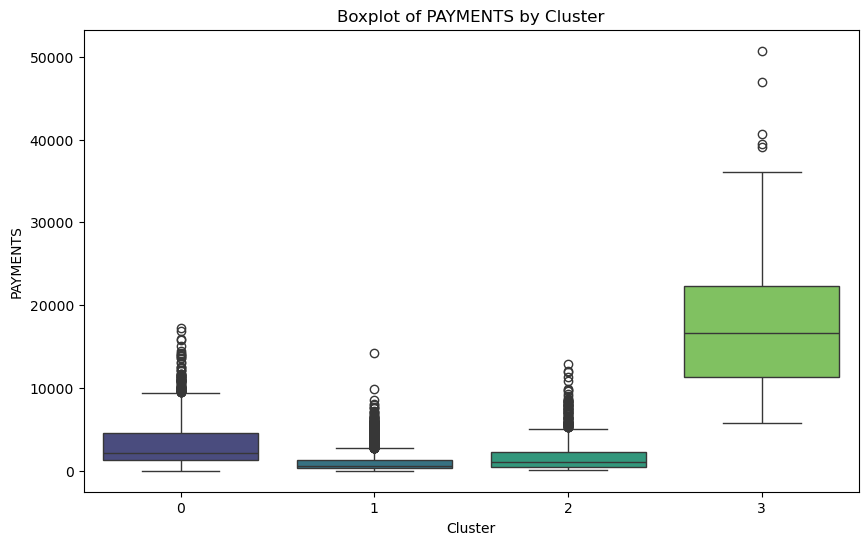

C:\Users\milto\AppData\Local\Temp\ipykernel_18860\2447366998.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df, palette='viridis')


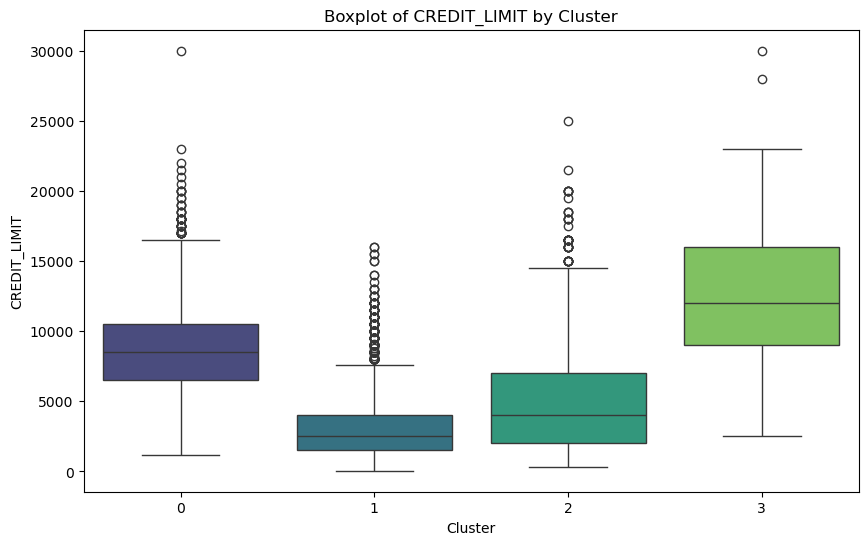

C:\Users\milto\AppData\Local\Temp\ipykernel_18860\2447366998.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df, palette='viridis')


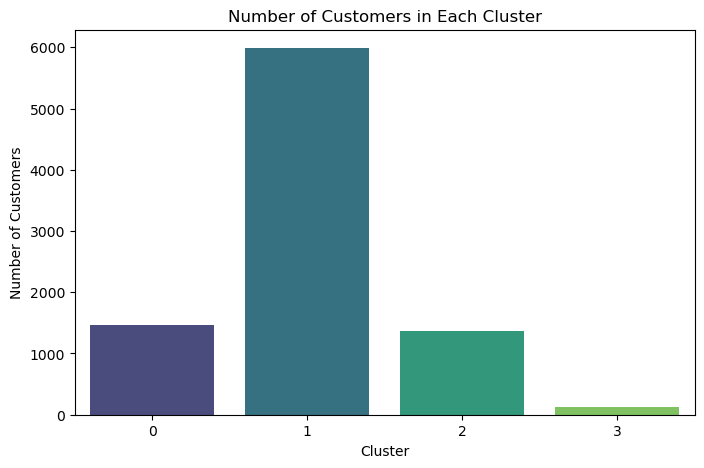

In [10]:
# Step 14: Apply K-Means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

print("\nCluster Assignments:")
print(df['Cluster'].value_counts())

# Step 15: Visualize the clusters - Boxplot for each feature
features_to_plot = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'PAYMENTS', 'CREDIT_LIMIT']

for feature in features_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=df, palette='viridis')
    plt.title(f'Boxplot of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()

# Step 16: Countplot to see the number of customers in each cluster
plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', data=df, palette='viridis')
plt.title('Number of Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()
